In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [575]:
df = pd.read_csv("../data/bank-additional-full.csv")
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [576]:
df.shape

(41188, 21)

##### There are 41188 records and 21 Features.

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###### The data types are correct as per the data

###### Lets change the name of the features to more meaningful ones

In [578]:
df.rename(columns={"y":"subscribe","emp.var.rate":"emp_var_rate","cons.price.idx":"cons_price_idx","cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed"}, inplace=True)

In [579]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])
df_num.columns,df_cat.columns

(Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
        'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
       dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'subscribe'],
       dtype='object'))

###### There are 10 numeric columns and 11 Categorical Columns

In [580]:
df.isnull().values.any()

False

In [581]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribe         0
dtype: int64

###### No missing data found.

In [582]:
df.duplicated().sum()

12

###### 12 duplcate rows found. we will delete them.

In [583]:
df = df.drop_duplicates()

In [584]:
df.duplicated().sum()

0

In [585]:
df.shape

(41176, 21)

###### Lets find the no of unique values in each columns. If the feature has constant value or 1 value then such columns can be dropped as they do add any value in model building.

In [586]:
for column in df.columns:
    print(column, df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp_var_rate 10
cons_price_idx 26
cons_conf_idx 26
euribor3m 316
nr_employed 11
subscribe 2


### Exploratory Data Analysis
We will explore the data to find missing values,find categorical features and their distribution and correlation with other categorical features, find numerical features and their distribution and corelation between other numerical features, correlation between all features and target feature , find outliers

###### Univariate Analysis

###### Categorica Data

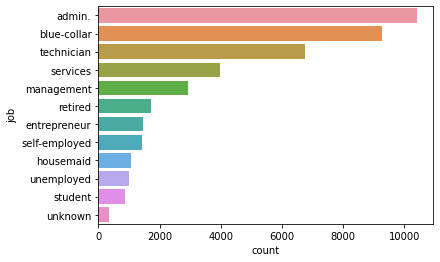

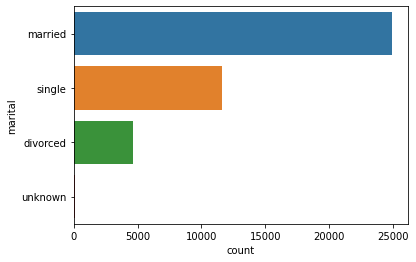

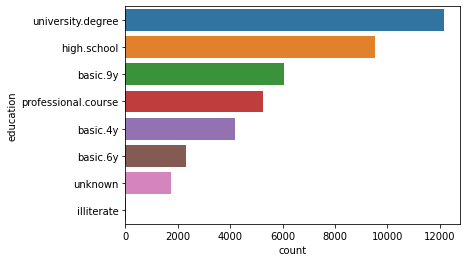

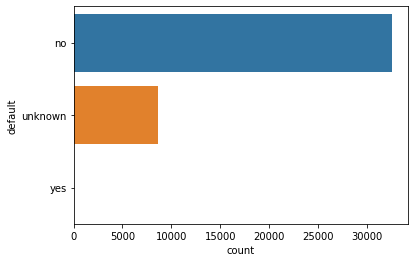

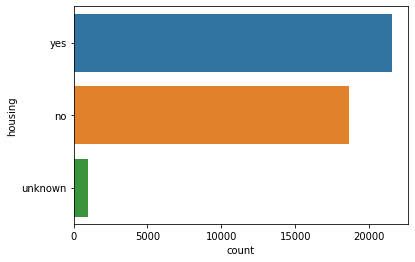

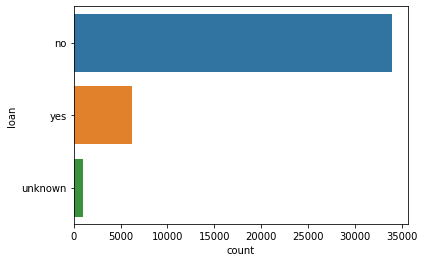

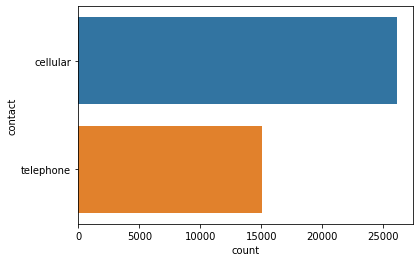

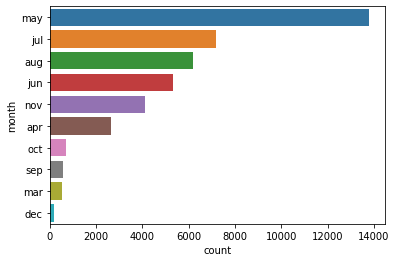

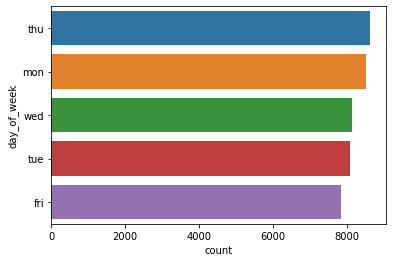

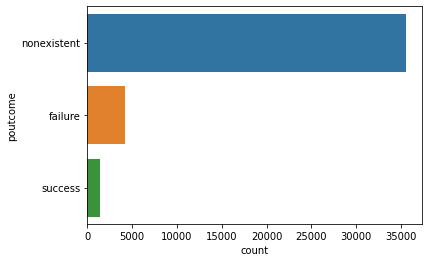

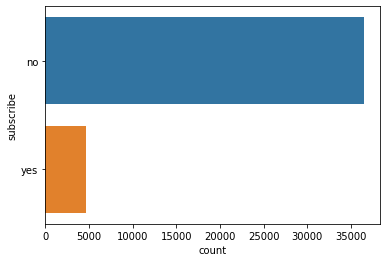

In [587]:
#Bar plots of categorical features
for feature in df_cat.columns:
    sns.countplot(y=feature, data=df_cat, order = df_cat[feature].value_counts().index)
    plt.show()

In [588]:
df.job.value_counts()/df.job.count()

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

###### The most of the clients are working in admin 25% and blue collar 22% job category.

In [589]:
df.marital.value_counts()/df.marital.count()

married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64

###### 60% of the clients are married.

In [590]:
df.education.value_counts()/df.education.count()

university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64

###### Most of the clients 29% hold University degree.

In [591]:
df.default.value_counts()/df.default.count()

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

###### The no of clients who defaulted on a credit, are very less. It shows 80% data for 'No'. % of yes is almost 0. so this feature doesn’t seem to be very for prediction purposes and can be dropped from the dataset.

In [592]:
df.housing.value_counts()/df.housing.count()

yes        0.523873
no         0.452084
unknown    0.024043
Name: housing, dtype: float64

###### Housing Shows almost equal % of yes and no.

In [593]:
df.loan.value_counts()/df.loan.count()

no         0.824218
yes        0.151739
unknown    0.024043
Name: loan, dtype: float64

###### Most of the clients do not have personal loan.

In [594]:
df.contact.value_counts()/df.contact.count()

cellular     0.634714
telephone    0.365286
Name: contact, dtype: float64

###### More than 63% of all clients were contacted through cellular phone.

In [595]:
df.month.value_counts()/df.month.count()

may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: month, dtype: float64

###### Most of the clients were contacted in the month of May 33%.

In [596]:
df.day_of_week.value_counts()/df.day_of_week.count()

thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: day_of_week, dtype: float64

###### Here we see equal distribution of the data in the graph and the % amongst the days. So there is no significant day which shows more activity than others.

In [597]:
df.poutcome.value_counts()/df.poutcome.count()

nonexistent    0.863391
failure        0.103264
success        0.033345
Name: poutcome, dtype: float64

###### More than 86% of cliets were never covered by previous marketing campaigns. 

In [598]:
df.subscribe.value_counts()/df.subscribe.count()

no     0.887337
yes    0.112663
Name: subscribe, dtype: float64

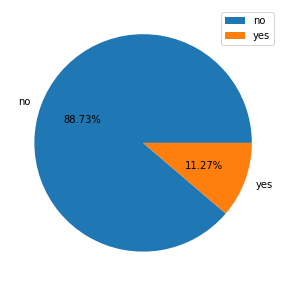

In [599]:
tgt_labels = df['subscribe'].unique()
tgt_values = df['subscribe'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(tgt_values, labels=tgt_labels, autopct='%1.2f%%')
plt.legend(loc = 'upper right')

###### We see there is imbalance in data. only 11.70% clients have subscribed to a term deposit.

###### Numerical Data

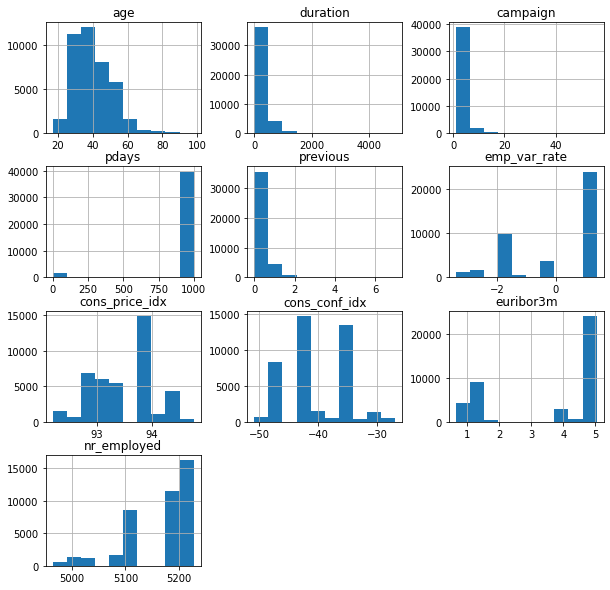

In [600]:
#histograms for numeric variable in df
hist = df.hist(bins=10,figsize =(10,10))

In [601]:
df.describe().T

count         mean         std       min       25%  \
age             41176.0    40.023800   10.420680    17.000    32.000   
duration        41176.0   258.315815  259.305321     0.000   102.000   
campaign        41176.0     2.567879    2.770318     1.000     1.000   
pdays           41176.0   962.464810  186.937102     0.000   999.000   
previous        41176.0     0.173013    0.494964     0.000     0.000   
emp_var_rate    41176.0     0.081922    1.570883    -3.400    -1.800   
cons_price_idx  41176.0    93.575720    0.578839    92.201    93.075   
cons_conf_idx   41176.0   -40.502863    4.627860   -50.800   -42.700   
euribor3m       41176.0     3.621293    1.734437     0.634     1.344   
nr_employed     41176.0  5167.034870   72.251364  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp_var_rate       1.100     1.400     1.400  
cons_price_idx    93.749    93.994    94.767  
cons_conf_idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr_employed     5191.000  5228.100  5228.100

In [602]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [603]:
import warnings
warnings.filterwarnings('ignore')

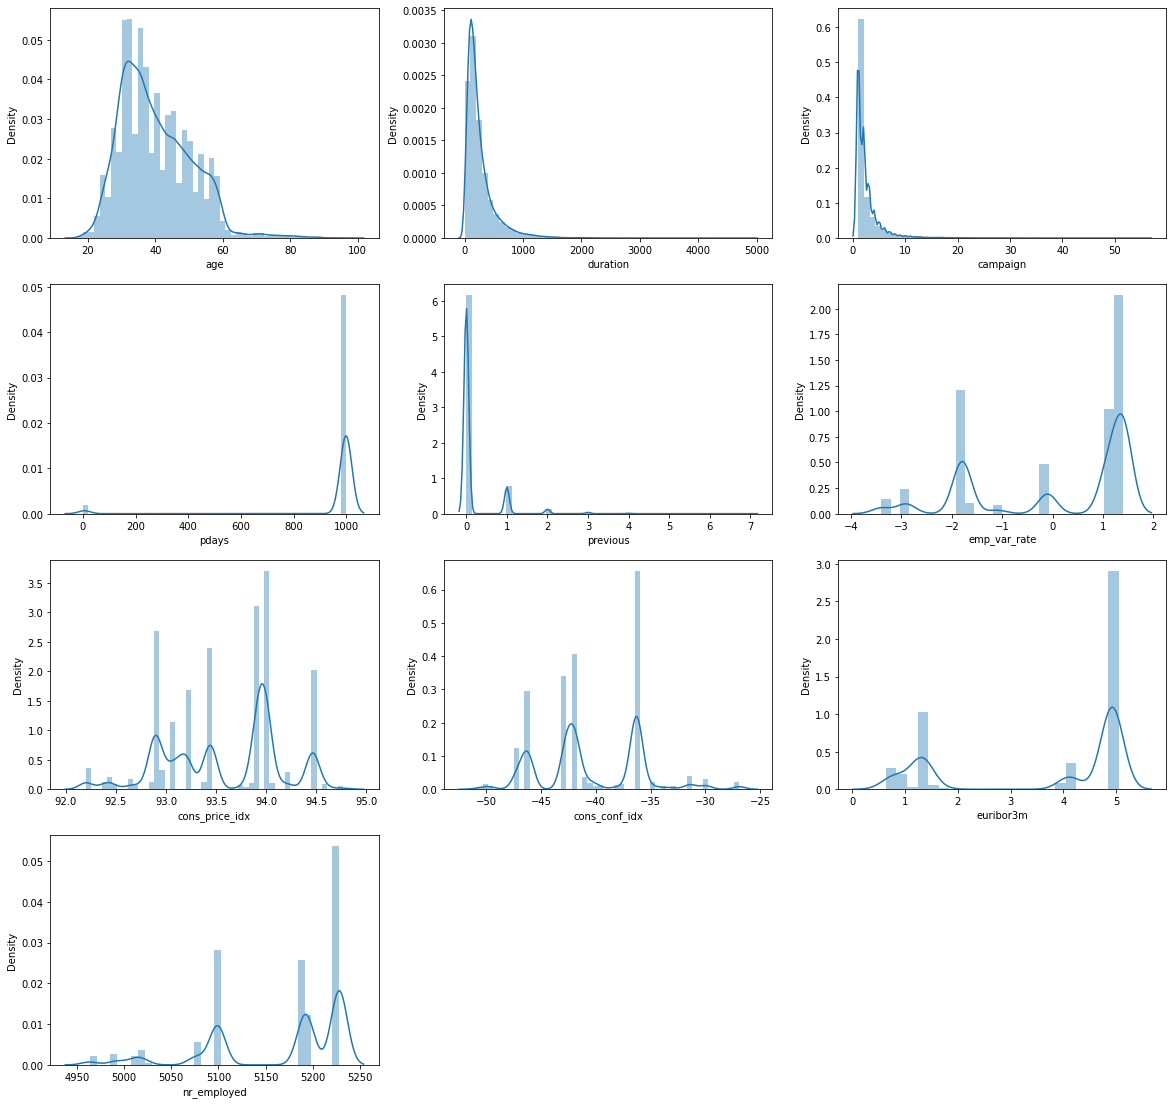

In [604]:
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_num.columns:
    ax= plt.subplot(12,3, plotnumber)
    sns.distplot(df_num[column])
    plt.xlabel(column)
    plotnumber += 1
plt.show()

- The graph of age shows normal distribution.
- The graph of pdays, previous, duration, campaign shows skewness. 
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
- The variable “duration” will need to be dropped before we start building a predictive model because it highly affects the output target (e.g., if duration=0 then y=”no”). Yet, the duration is not known before a call is performed.
- Other graphs shows servral spikes in the data.

### Bivariate Analysis

#### Relation between Categorical features and target variable

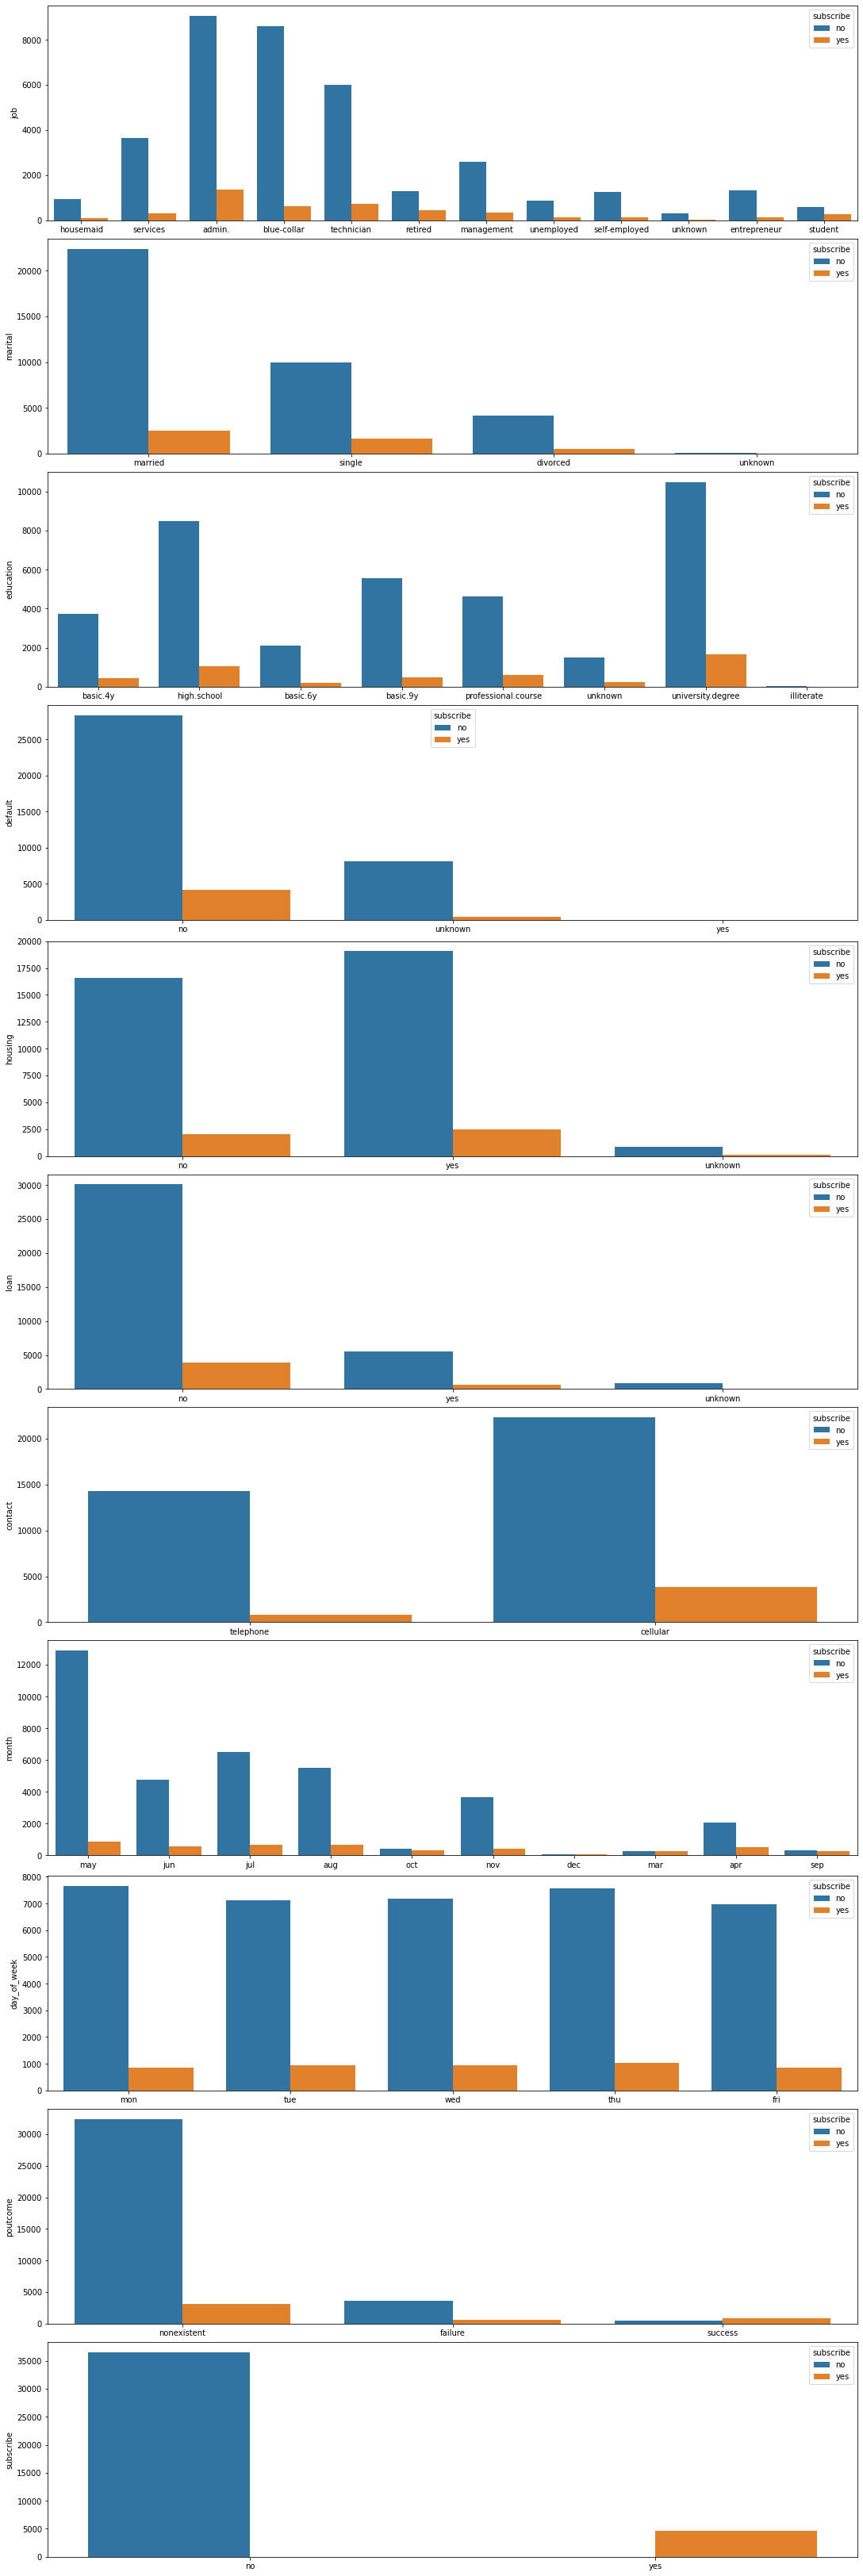

In [605]:
fig, ax = plt.subplots(len(df_cat.columns),  figsize = (15, 45), constrained_layout = True)
for i, var in enumerate(df_cat.columns): 
    sns.countplot(data = df, x = var, hue = 'subscribe', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

- The clients having housing, loan have higher % or saying no to term deposit.
- The retired people seem to have higher % of 'Yes' for term deposit than other job category clients.
- The months may, jun, juy, aug shows more clients responding to term deposit
- if poutcome = success then the % of 'yes' to term deposit is high
- % of interest in 'Deposit'is more when clients are contacted via cellular mode.
- The % of clients showing interest in 'term deposit' is more when they are married, holds university degree and no defaulted to credit.

#### Relation between Numerical features and target variable

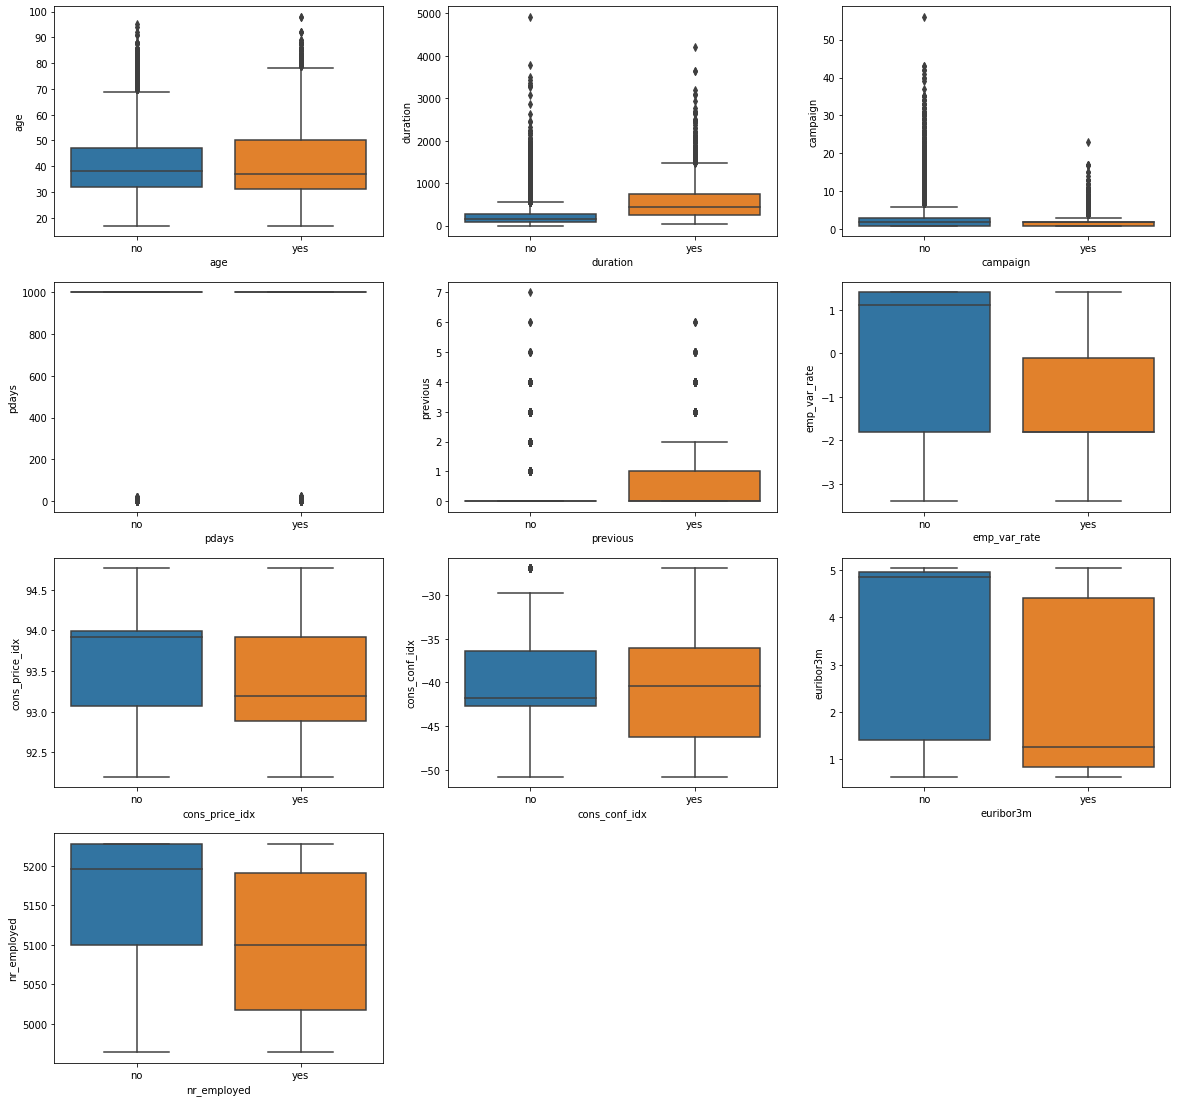

In [606]:
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_num.columns:
    ax= plt.subplot(12,3, plotnumber)
    sns.boxplot(x='subscribe', y=df[column], data=df)
    plt.xlabel(column)
    plotnumber += 1
plt.show()


Clients having longer durations shows more interest in term deposit

#### Finding Outliers

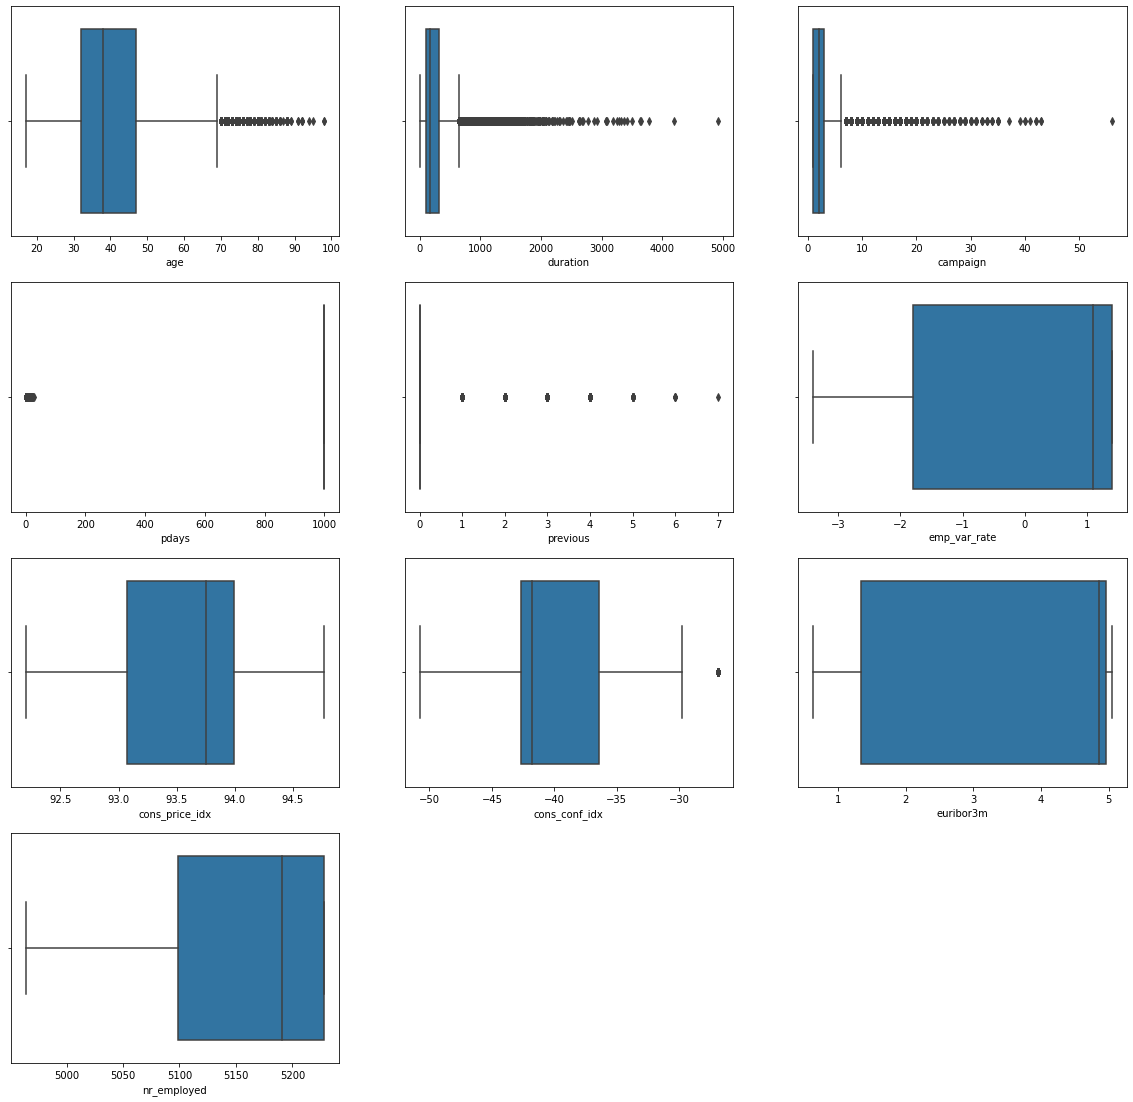

In [607]:
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_num.columns:
    ax= plt.subplot(12,3, plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column)
    plotnumber += 1
plt.show()


The features like age, pdays, duration, campaign, duration has some outliers

#### Multivariate analysis

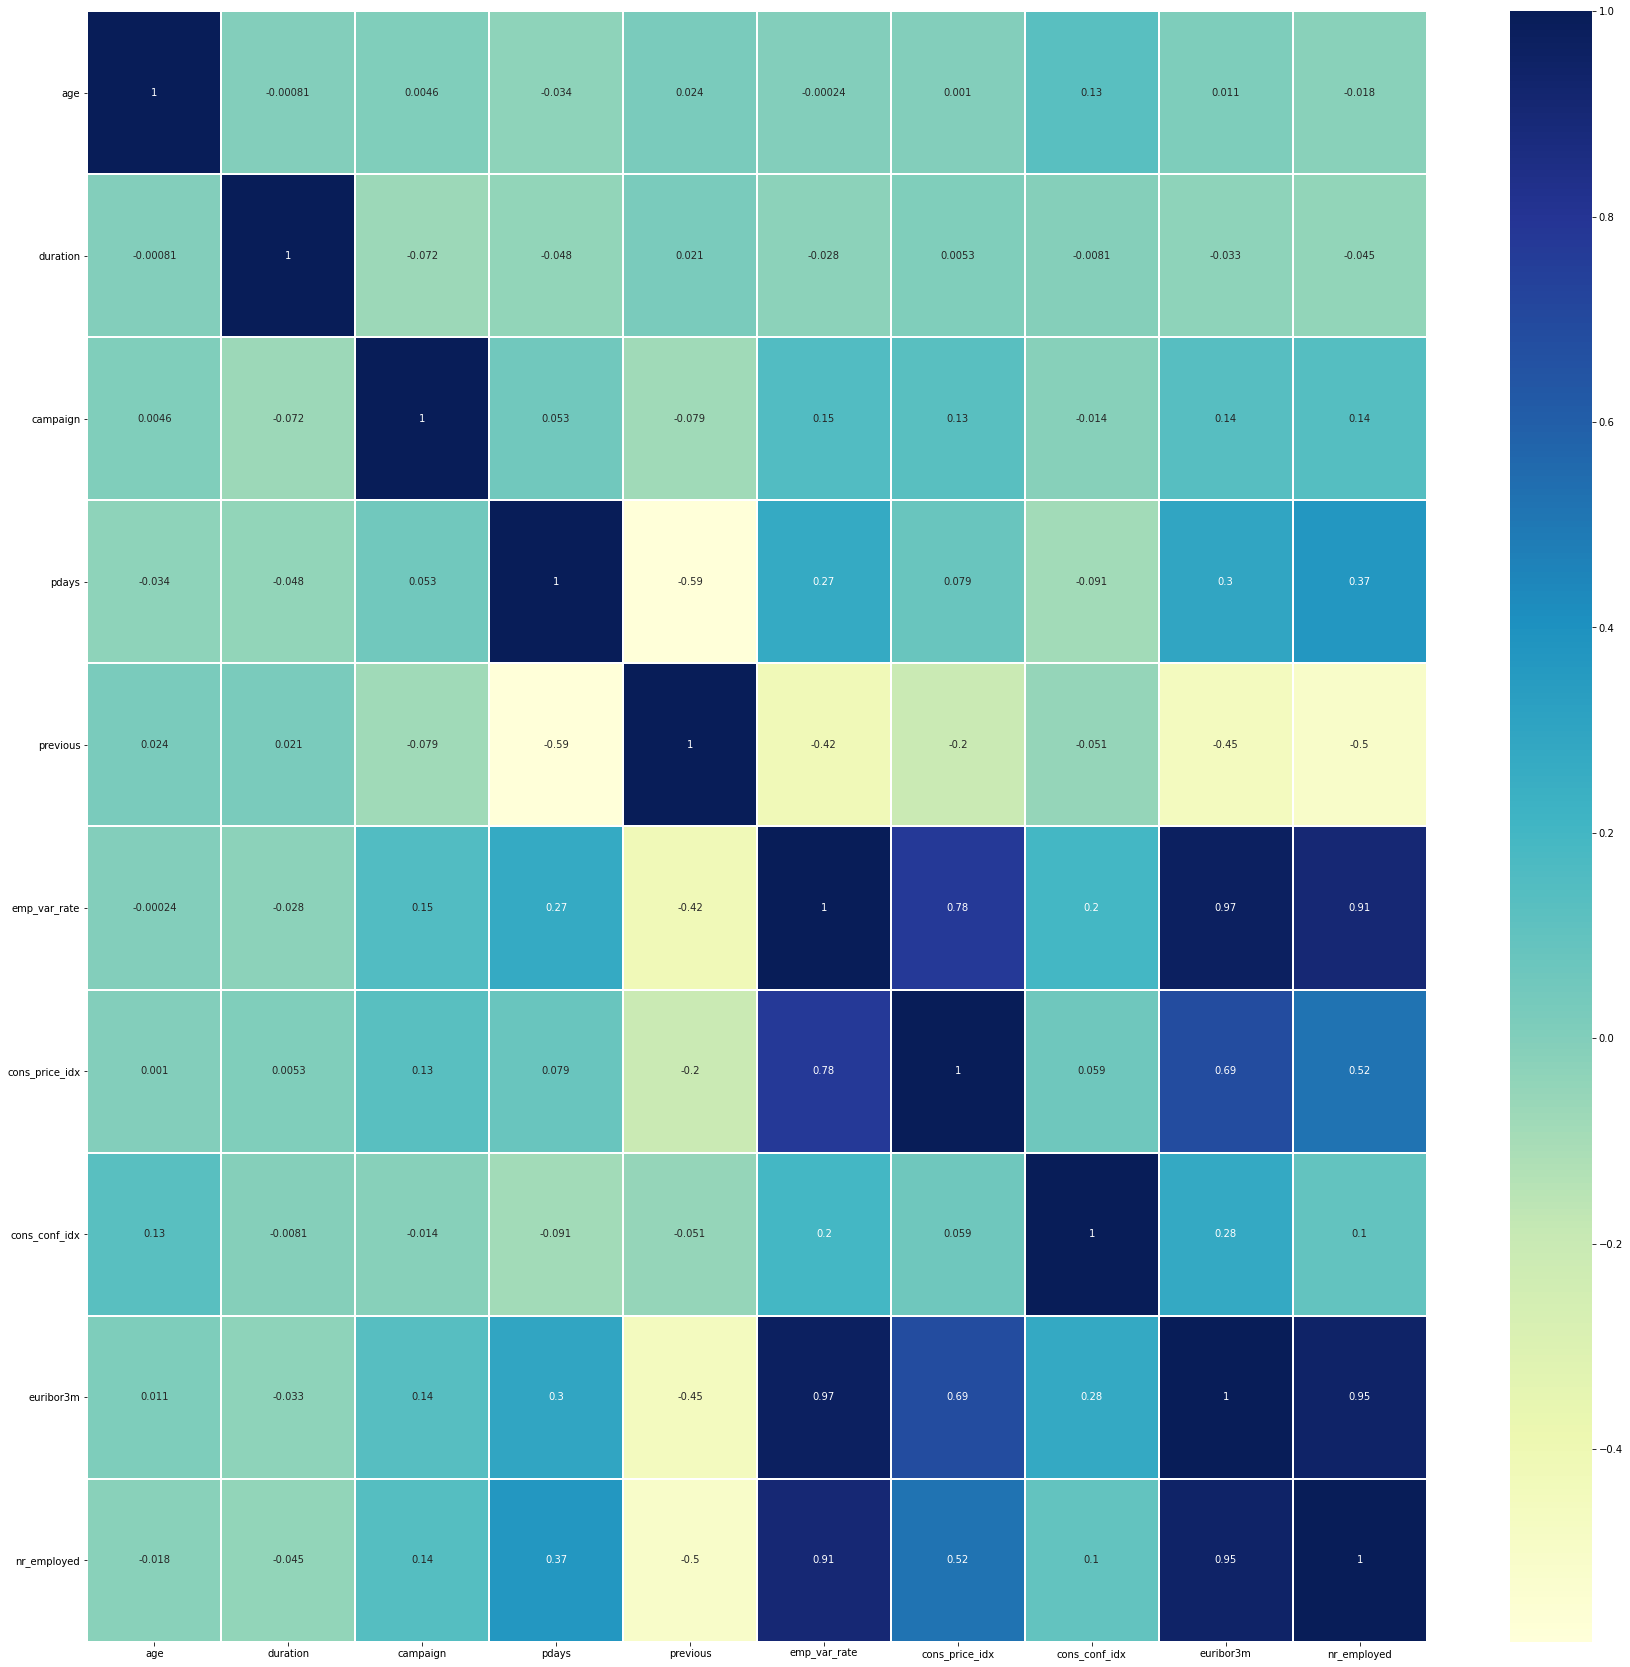

In [608]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

###### as we see in above graph , euribor3m is highly corelated with 'emp_var_rate' and nr_employed. so we can drop 'emp_var_rate' and nr_employed as they will only add redundancy and overfitting.

### Feature Engineering

We will drop the unwanted features , handle missing data, remove outliers

In [609]:
df2 = df.copy()

#### As per the analysis we did in EDA, lets drop below features

In [610]:
df2=df2.drop('emp_var_rate',axis=1)
df2=df2.drop('nr_employed',axis=1)
df2=df2.drop('default',axis=1)

###### The pdays column contains most of the data as 999. 
pdays: number of days that passed by after the client was last contacted from a previous campaign 
(numeric; 999 means client was not previously contacted)
lets find how many values are with 999

In [611]:
df2['pdays'].value_counts(normalize=True)

999    0.963207
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

###### As it shows above 96% values are having 999 value. so we will remove this column.

In [612]:
df2=df2.drop('pdays',axis=1)

In [613]:
df2['campaign'].value_counts(normalize=True)

1     0.428259
2     0.256654
3     0.129687
4     0.064358
5     0.038833
6     0.023776
7     0.015276
8     0.009714
9     0.006873
10    0.005464
11    0.004299
12    0.003036
13    0.002234
14    0.001676
17    0.001409
16    0.001239
15    0.001239
18    0.000801
20    0.000729
19    0.000631
21    0.000583
22    0.000413
23    0.000389
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

In [614]:
df2 = df2[df2['campaign'] < 33]

In [615]:
df['previous'].value_counts(normalize=True)

0    0.863391
1    0.110768
2    0.018312
3    0.005246
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

In [616]:
df2.shape

(41154, 17)

In [617]:
df2=df2[df2['age']<np.nanpercentile(df2['age'], 99)]
df2=df2[df2['duration']<np.nanpercentile(df2['duration'], 99)]
df2=df2[df2['cons_conf_idx']<np.nanpercentile(df2['cons_conf_idx'], 99)]
df2=df2[df2['campaign']<np.nanpercentile(df2['campaign'], 99)]

In [618]:
df2_num = df2.select_dtypes(include=[np.number])
df2_cat = df2.select_dtypes(exclude=[np.number])

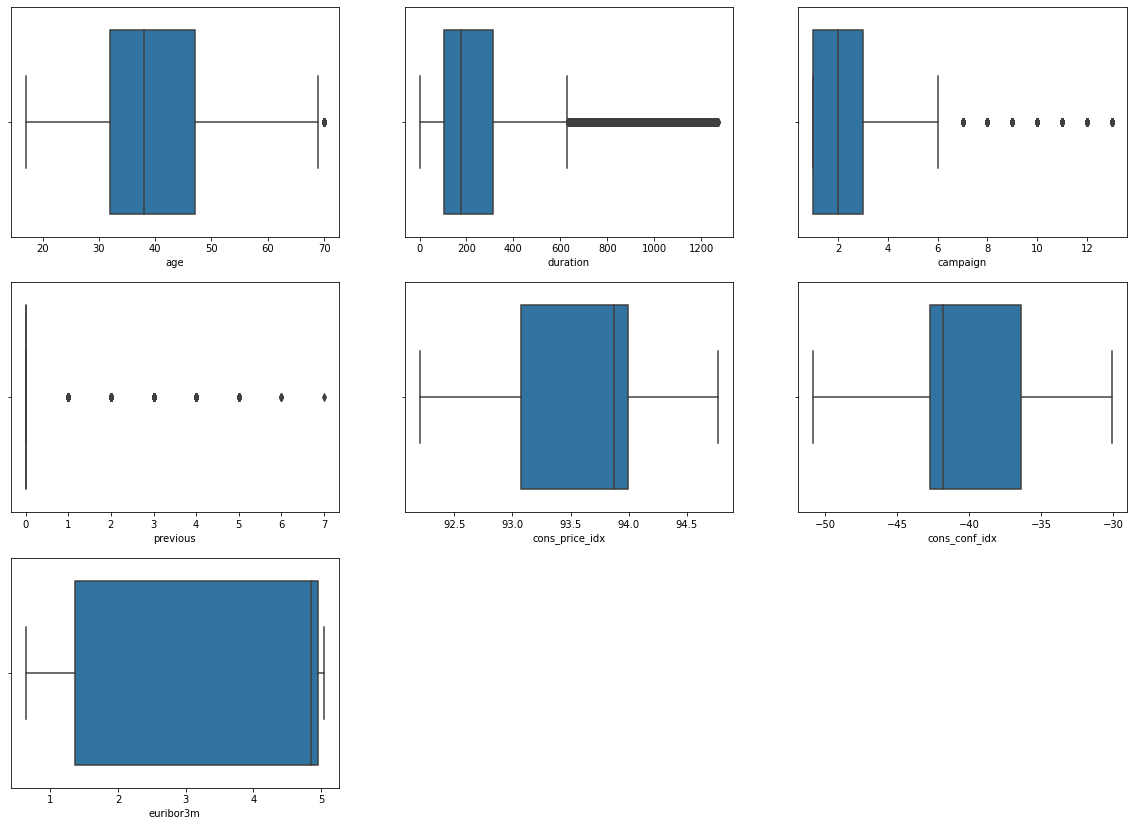

In [619]:
plt.figure(figsize=(20,60))
plotnumber=1
for column in df2_num.columns:
    ax= plt.subplot(12,3, plotnumber)
    sns.boxplot(df2[column])
    plt.xlabel(column)
    plotnumber += 1
plt.show()

In [620]:
df2.shape

(39241, 17)

In [621]:
df2.head()

age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  duration  campaign  previous     poutcome  cons_price_idx  \
0         mon       261         1         0  nonexistent          93.994   
1         mon       149         1         0  nonexistent          93.994   
2         mon       226         1         0  nonexistent          93.994   
3         mon       151         1         0  nonexistent          93.994   
4         mon       307         1         0  nonexistent          93.994   

   cons_conf_idx  euribor3m subscribe  
0          -36.4      4.857        no  
1          -36.4      4.857        no  
2          -36.4      4.857        no  
3          -36.4      4.857        no  
4          -36.4      4.857        no

In [622]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
subscribe         0
dtype: int64

In [623]:
df2['subscribe'] = df2['subscribe'] .replace(to_replace = "yes", value = 1)
df2['subscribe']  = df2['subscribe'] .replace(to_replace = "no", value = 0)

In [624]:
df2.describe().T

count        mean         std     min      25%      50%  \
age             39241.0   39.575750    9.642326  17.000   32.000   38.000   
duration        39241.0  245.050687  213.001863   0.000  103.000  178.000   
campaign        39241.0    2.381489    1.960863   1.000    1.000    2.000   
previous        39241.0    0.164726    0.481969   0.000    0.000    0.000   
cons_price_idx  39241.0   93.593450    0.560230  92.201   93.075   93.876   
cons_conf_idx   39241.0  -40.742354    4.339718 -50.800  -42.700  -41.800   
euribor3m       39241.0    3.680839    1.699342   0.634    1.365    4.857   
subscribe       39241.0    0.099845    0.299796   0.000    0.000    0.000   

                    75%       max  
age              47.000    70.000  
duration        314.000  1271.000  
campaign          3.000    13.000  
previous          0.000     7.000  
cons_price_idx   93.994    94.767  
cons_conf_idx   -36.400   -30.100  
euribor3m         4.961     5.045  
subscribe         0.000     1.000

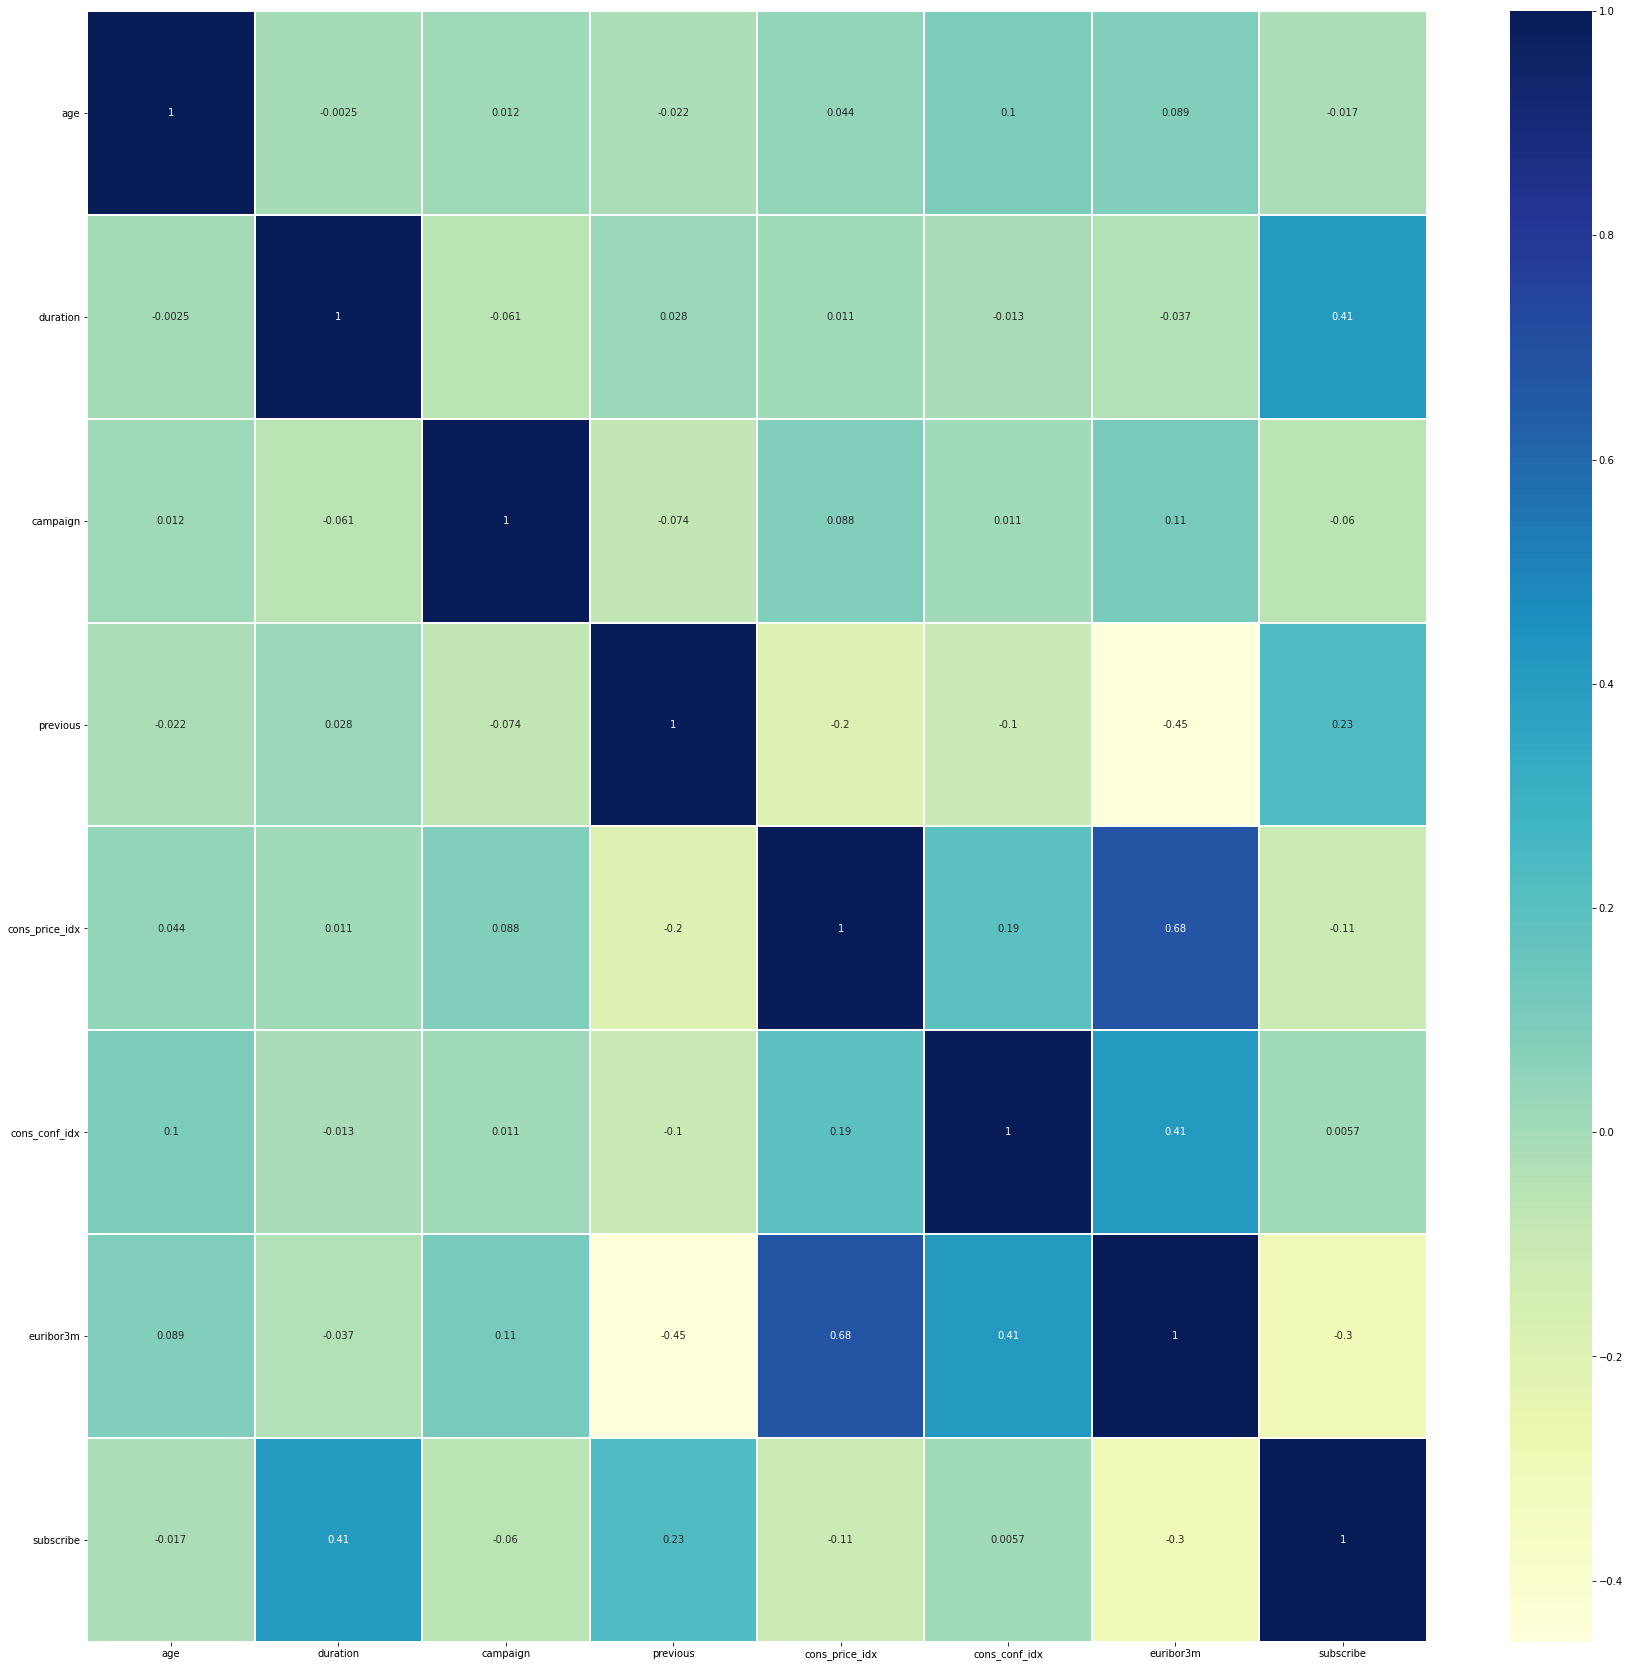

In [625]:
### create the correlation matrix heat map
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [626]:
from pathlib import Path  
filepath = Path('../data/train_clean.csv') 
df2.to_csv(filepath, index=False)  

### Preprocessing

In [649]:
from pathlib import Path  
filepath = Path('../data/train_clean.csv') 
clean_data = pd.read_csv(filepath)
clean_data.head()

age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  duration  campaign  previous     poutcome  cons_price_idx  \
0         mon       261         1         0  nonexistent          93.994   
1         mon       149         1         0  nonexistent          93.994   
2         mon       226         1         0  nonexistent          93.994   
3         mon       151         1         0  nonexistent          93.994   
4         mon       307         1         0  nonexistent          93.994   

   cons_conf_idx  euribor3m  subscribe  
0          -36.4      4.857          0  
1          -36.4      4.857          0  
2          -36.4      4.857          0  
3          -36.4      4.857          0  
4          -36.4      4.857          0

In [650]:
X = clean_data.drop('subscribe', axis=1)
cat_cols = X.select_dtypes(include='object').columns.values
cat_cols

array(['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'], dtype=object)

In [651]:
X=pd.get_dummies(X, columns= cat_cols, drop_first = True, prefix =cat_cols)
y=clean_data['subscribe']

In [652]:
y=clean_data['subscribe']

In [653]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39241 entries, 0 to 39240
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39241 non-null  int64  
 1   duration                       39241 non-null  int64  
 2   campaign                       39241 non-null  int64  
 3   previous                       39241 non-null  int64  
 4   cons_price_idx                 39241 non-null  float64
 5   cons_conf_idx                  39241 non-null  float64
 6   euribor3m                      39241 non-null  float64
 7   job_blue-collar                39241 non-null  uint8  
 8   job_entrepreneur               39241 non-null  uint8  
 9   job_housemaid                  39241 non-null  uint8  
 10  job_management                 39241 non-null  uint8  
 11  job_retired                    39241 non-null  uint8  
 12  job_self-employed              39241 non-null 

In [654]:
print(X.isnull().sum())

age                              0
duration                         0
campaign                         0
previous                         0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
housing_unknown     

In [655]:
print(X.isna().sum())

age                              0
duration                         0
campaign                         0
previous                         0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
housing_unknown     

In [656]:
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [657]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [658]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((31392, 48), (7849, 48), (31392,), (7849,))

In [659]:
X_train.head()

age  duration  campaign  previous  cons_price_idx  cons_conf_idx  \
34755   38       178         1         0          92.893          -46.2   
11065   52       106         2         0          94.465          -41.8   
21846   30        72         1         0          93.444          -36.1   
8621    29       133         1         0          94.465          -41.8   
19928   52       140         3         0          93.444          -36.1   

       euribor3m  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
34755      1.244                1                 0              0  ...   
11065      4.961                1                 0              0  ...   
21846      4.964                0                 0              0  ...   
8621       4.866                0                 0              0  ...   
19928      4.966                0                 0              1  ...   

       month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
34755          1          0          0          0                1   
11065          0          0          0          0                0   
21846          0          0          0          0                0   
8621           0          0          0          0                0   
19928          0          0          0          0                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
34755                0                0                0   
11065                1                0                0   
21846                0                0                0   
8621                 1                0                0   
19928                0                1                0   

       poutcome_nonexistent  poutcome_success  
34755                     1                 0  
11065                     1                 0  
21846                     1                 0  
8621                      1                 0  
19928                     1                 0  

[5 rows x 48 columns]

In [660]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31392 entries, 34755 to 11590
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            31392 non-null  int64  
 1   duration                       31392 non-null  int64  
 2   campaign                       31392 non-null  int64  
 3   previous                       31392 non-null  int64  
 4   cons_price_idx                 31392 non-null  float64
 5   cons_conf_idx                  31392 non-null  float64
 6   euribor3m                      31392 non-null  float64
 7   job_blue-collar                31392 non-null  uint8  
 8   job_entrepreneur               31392 non-null  uint8  
 9   job_housemaid                  31392 non-null  uint8  
 10  job_management                 31392 non-null  uint8  
 11  job_retired                    31392 non-null  uint8  
 12  job_self-employed              31392 non-n

In [661]:
# Logistic, SVM, Neural Networks and KNN are sensitive to scaling.  
#Since we are using these algorithms, we should use scaled data in these models.

from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [662]:
X_scaled

array([[ 1.70719861,  0.08075072, -0.70510915, ..., -0.49783887,
         0.3883523 , -0.17336793],
       [ 1.81109685, -0.44788015, -0.70510915, ..., -0.49783887,
         0.3883523 , -0.17336793],
       [-0.2668681 , -0.08444643, -0.70510915, ..., -0.49783887,
         0.3883523 , -0.17336793],
       ...,
       [ 0.66821613,  0.65658077, -0.70510915, ..., -0.49783887,
         0.3883523 , -0.17336793],
       [ 1.70719861, -0.25908341, -0.19524375, ..., -0.49783887,
         0.3883523 , -0.17336793],
       [ 0.46041963,  0.93505596, -0.70510915, ..., -0.49783887,
         0.3883523 , -0.17336793]])

### Model Selection

In [663]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

In [664]:
log_reg = LogisticRegression(random_state=42)
# Fit the model on the trainng data.
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [665]:
results = cross_val_score(log_reg,X_train_scaled,y_train, cv=5)
print(results)
print(np.mean(results))

[0.92403249 0.9162287  0.91892322 0.92067537 0.92083466]
0.9201388894173913


In [666]:
#test score 
log_reg.score(X_test_scaled, y_test)

0.9126003312523888

In [667]:
y_pred = log_reg.predict(X_test_scaled)

In [668]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6819,  197],
       [ 489,  344]], dtype=int64)

In [669]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('LogisticRegression Accuracy : ', "%.2f" % (acc_score*100))
print('LogisticRegression F1 : ', "%.2f" % (f1*100))

LogisticRegression Accuracy :  91.26
LogisticRegression F1 :  90.42


In [670]:
print(classification_report(y_test,y_pred, target_names = ['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.93      0.97      0.95      7016
          No       0.64      0.41      0.50       833

    accuracy                           0.91      7849
   macro avg       0.78      0.69      0.73      7849
weighted avg       0.90      0.91      0.90      7849



###### RandomForestClassifier : 

In [671]:
#class_weight={1: 0.15, 2:0.5, 3: 1.5},random_state=42,verbose=False
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [672]:
results = cross_val_score(rfc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.92355471 0.91941392 0.91892322 0.91669321 0.92147181]
0.9200113740482454


In [673]:
#test score
rfc.score(X_test, y_test)

0.9199898076188049

In [674]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7016
           1       0.69      0.45      0.55       833

    accuracy                           0.92      7849
   macro avg       0.81      0.71      0.75      7849
weighted avg       0.91      0.92      0.91      7849



In [675]:
acc_score = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc, average='weighted')
print('RandomForestClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('RandomForestClassifier F1 : ', "%.2f" % (f1*100))

RandomForestClassifier Accuracy :  92.00
RandomForestClassifier F1 :  91.26


###### GradientBoostingClassifier

In [676]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [677]:
results = cross_val_score(gbc,X_train,y_train, cv=5)
print(results)
print(np.mean(results))

[0.92896958 0.92594362 0.92354253 0.92481682 0.92529468]
0.9257134465370264


In [678]:
#test score
gbc.score(X_test, y_test)

0.9197349980889286

In [679]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7016
           1       0.67      0.47      0.56       833

    accuracy                           0.92      7849
   macro avg       0.81      0.72      0.76      7849
weighted avg       0.91      0.92      0.91      7849



In [680]:
acc_score = accuracy_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc, average='weighted')
print('GradientBoostingClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('GradientBoostingClassifier F1 : ', "%.2f" % (f1*100))

GradientBoostingClassifier Accuracy :  91.97
GradientBoostingClassifier F1 :  91.35


###### XGBClassifier

In [681]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# make predictions for test data
y_pred_xgb = xgb.predict(X_test)
#test score
xgb.score(X_test, y_test)

0.9183335456746082

In [682]:
results = cross_val_score(xgb,X_train, y_train, cv=5)
print(results)
print(np.mean(results))

[0.92403249 0.92339545 0.91987894 0.91701179 0.9227461 ]
0.9214129522798858


In [683]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7016
           1       0.65      0.50      0.57       833

    accuracy                           0.92      7849
   macro avg       0.80      0.74      0.76      7849
weighted avg       0.91      0.92      0.91      7849



In [684]:
acc_score = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print('XGBClassifier Accuracy : ', "%.2f" % (acc_score*100))
print('XGBClassifier F1 : ', "%.2f" % (f1*100))

XGBClassifier Accuracy :  91.83
XGBClassifier F1 :  91.38


###### Imbalance Data Handling 
Oversampling is one of the most widely used techniques to deal with imbalance classes. To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model

In [685]:
# original counts :
y.value_counts()

0    35323
1     3918
Name: subscribe, dtype: int64

<AxesSubplot:xlabel='subscribe', ylabel='count'>

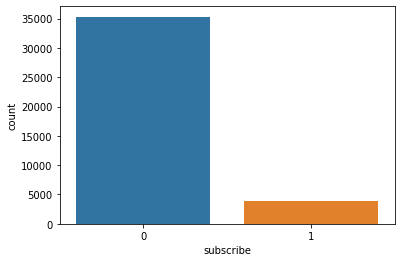

In [686]:
sns.countplot(x="subscribe", data=df2)

In [687]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [688]:
unique, counts = np.unique(y_train_ros, return_counts=True)
dict(zip(unique, counts))

{0: 28307, 1: 28307}

In [689]:
final_model2 = RandomForestClassifier()
final_model2.fit(X_train_ros, y_train_ros)
y_pred_final2 = final_model2.predict(X_test)
#test score
final_model2.score(X_test, y_test)

0.9173143075551026

In [690]:
acc_score = accuracy_score(y_test, y_pred_final2)
f1 = f1_score(y_test, y_pred_final2, average='weighted')
print('RandomOverSampler Accuracy : ', "%.2f" % (acc_score*100))
print('RandomOverSampler F1 : ', "%.2f" % (f1*100))

RandomOverSampler Accuracy :  91.73
RandomOverSampler F1 :  91.62


###### Using RandomUnderSampler

In [691]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [692]:
# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_rus, return_counts=True)
dict(zip(unique, counts))

{0: 3085, 1: 3085}

In [693]:
final_model3 = RandomForestClassifier()
final_model3.fit(X_train_rus, y_train_rus)
y_pred_final3 = final_model3.predict(X_test)
#test score
final_model3.score(X_test, y_test)

0.85348452032106

In [694]:
acc_score = accuracy_score(y_test, y_pred_final3)
f1 = f1_score(y_test, y_pred_final3, average='weighted')
print('RandomUnderSampler Accuracy : ', "%.2f" % (acc_score*100))
print ('RandomUnderSampler F1 : ', "%.2f" % (f1*100))

RandomUnderSampler Accuracy :  85.35
RandomUnderSampler F1 :  87.56


###### Using class_weight  and data adusted with RandomOverSampler

In [695]:
final_model4 = RandomForestClassifier(random_state=42, class_weight ='balanced')
final_model4.fit(X_train_ros, y_train_ros)
y_pred_final4 = final_model4.predict(X_test)
#test score
final_model4.score(X_test, y_test)

0.9211364505032488

In [696]:
acc_score = accuracy_score(y_test, y_pred_final4)
f1 = f1_score(y_test, y_pred_final4, average='weighted')
print('Random Forest classifier with class_weight and ROS Accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier with class_weight and ROS  F1 : ', "%.2f" % (f1*100))

Random Forest classifier with class_weight and ROS Accuracy :  92.11
Random Forest classifier with class_weight and ROS  F1 :  92.03


In [697]:
print(classification_report(y_test,y_pred_final4))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7016
           1       0.63      0.61      0.62       833

    accuracy                           0.92      7849
   macro avg       0.79      0.78      0.79      7849
weighted avg       0.92      0.92      0.92      7849



#### HyperParameter Tunning

###### GridSearchCV

In [504]:
rfc = RandomForestClassifier(random_state=42)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [505]:
from datetime import datetime
print(datetime.now())

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train_ros, y_train_ros)
print("Best Score:" + str(CV_rfc.best_score_))
print("Best Parameters: " + str(CV_rfc.best_params_))
from datetime import datetime
print(datetime.now())

#2022-09-19 09:41:34.430864
#Best Score:0.8957855461063404
#Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
#2022-09-19 10:18:51.570752

2022-09-19 09:41:34.430864
Best Score:0.8957855461063404
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
2022-09-19 10:18:51.570752


In [507]:
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(param_grid)
len(param_size)

60

In [698]:
model = RandomForestClassifier(random_state=42, criterion= 'entropy', max_depth=8, max_features='auto', n_estimators= 200,class_weight ='balanced')
model.fit(X_train_ros, y_train_ros)
y_pred = model.predict(X_test)
#test score
model.score(X_test, y_test)

0.8417632819467448

In [699]:
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+ROS+Class_weight+GridSearchCV accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+ROS+Class_weight+GridSearchCV F1 : ', "%.2f" % (f1*100))

Random Forest classifier+ROS+Class_weight+GridSearchCV accuracy :  84.18
Random Forest classifier+ROS+Class_weight+GridSearchCV F1 :  86.70


###### RandomizedSearchCV

In [700]:
from sklearn.model_selection import RandomizedSearchCV

In [512]:
param_grid = { 
    'n_estimators': [200, 400, 800],
    'max_features': ['auto', 'log2'],
    'max_depth' : [10,20,30,40],
    'criterion' :['gini', 'entropy']
}
# calculate the o of iterations here which is 3*2*4*2 =48. we shoud ideally give less than 48.
from datetime import datetime
print(datetime.now())
rfc = RandomForestClassifier(random_state=42)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 24, cv = 5,random_state=42)
rfc_random.fit(X_train_ros, y_train_ros)
print("RandomizedSearchCV Best Score:" + str(rfc_random.best_score_))
print("RandomizedSearchCV Best Parameters: " + str(rfc_random.best_params_))
print(datetime.now())

2022-09-19 10:27:03.862740
RandomizedSearchCV Best Score:0.975447809634343
RandomizedSearchCV Best Parameters: {'n_estimators': 800, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}
2022-09-19 11:14:37.967982


In [701]:
model = RandomForestClassifier(random_state=42, criterion = 'gini', class_weight ='balanced', n_estimators=800, max_features='log2', max_depth=30)
model.fit(X_train_ros, y_train_ros)
y_pred = model.predict(X_test)
#test score
model.score(X_test, y_test)
#0.4932594644506002
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  F1 : ', "%.2f" % (f1*100))

Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  accuracy :  91.88
Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  F1 :  91.73


0.7678757934188498


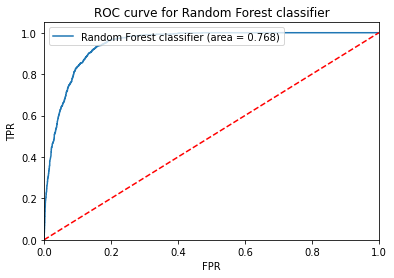

In [703]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(roc_auc)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest classifier')
plt.legend(loc="upper left")
plt.show()

###### feature_importance

30


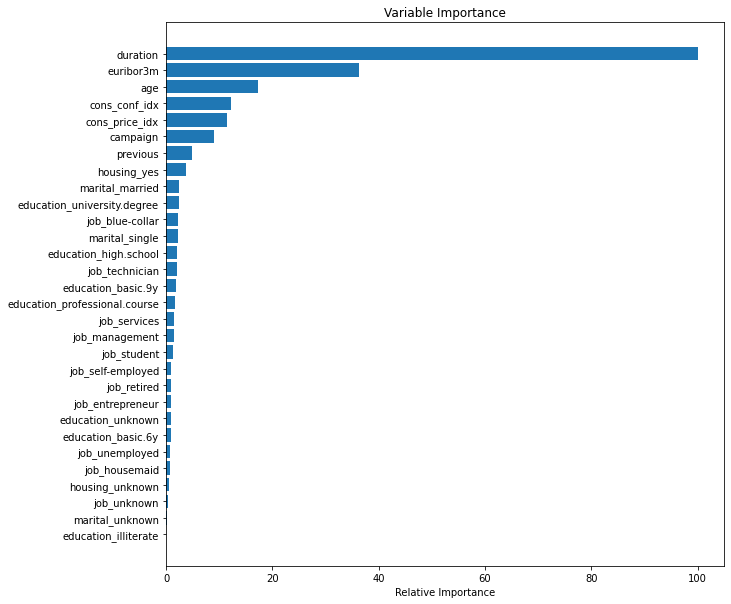

In [704]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Feature importance shows Duration , Euribor3m  and Age as the important features.

As the problem statement also requires to check the model efficiency without Duration feature, we wil check that below

In [705]:
X_train.head()

age  duration  campaign  previous  cons_price_idx  cons_conf_idx  \
34755   38       178         1         0          92.893          -46.2   
11065   52       106         2         0          94.465          -41.8   
21846   30        72         1         0          93.444          -36.1   
8621    29       133         1         0          94.465          -41.8   
19928   52       140         3         0          93.444          -36.1   

       euribor3m  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
34755      1.244                1                 0              0  ...   
11065      4.961                1                 0              0  ...   
21846      4.964                0                 0              0  ...   
8621       4.866                0                 0              0  ...   
19928      4.966                0                 0              1  ...   

       month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
34755          1          0          0          0                1   
11065          0          0          0          0                0   
21846          0          0          0          0                0   
8621           0          0          0          0                0   
19928          0          0          0          0                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
34755                0                0                0   
11065                1                0                0   
21846                0                0                0   
8621                 1                0                0   
19928                0                1                0   

       poutcome_nonexistent  poutcome_success  
34755                     1                 0  
11065                     1                 0  
21846                     1                 0  
8621                      1                 0  
19928                     1                 0  

[5 rows x 48 columns]

In [706]:
X_train_new = X_train.drop('duration', axis=1)
X_test_new = X_test.drop('duration', axis=1)

In [707]:
X_train_new.shape, X_test_new.shape,y_train.shape, y_test.shape

((31392, 47), (7849, 47), (31392,), (7849,))

In [708]:
X_train_new.columns

Index(['age', 'campaign', 'previous', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [711]:
from imblearn.over_sampling import RandomOverSampler
ros1 = RandomOverSampler(random_state=42)
X_train_ros1, y_train_ros1 = ros1.fit_resample(X_train_new, y_train)

# counts after over_sampling
#y_train_ros.value_counts()
unique, counts = np.unique(y_train_ros1, return_counts=True)
dict(zip(unique, counts))

{0: 28307, 1: 28307}

In [567]:
param_grid = { 
    'n_estimators': [200, 400, 800],
    'max_features': ['auto', 'log2'],
    'max_depth' : [10,20,30,40],
    'criterion' :['gini', 'entropy']
}
# calculate the o of iterations here which is 3*2*4*2 =48. we shoud ideally give less than 48.
from datetime import datetime
print(datetime.now())
rfc = RandomForestClassifier(random_state=42)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 24, cv = 5,random_state=42)
rfc_random.fit(X_train_ros1, y_train_ros1)
print("RandomizedSearchCV Best Score:" + str(rfc_random.best_score_))
print("RandomizedSearchCV Best Parameters: " + str(rfc_random.best_params_))
print(datetime.now())

2022-09-19 12:50:49.524625
RandomizedSearchCV Best Score:0.9700251092430466
RandomizedSearchCV Best Parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'gini'}
2022-09-19 14:00:46.409853


In [712]:
model1 = RandomForestClassifier(random_state=42, criterion = 'gini', class_weight ='balanced', n_estimators=400, max_features='auto', max_depth=30)
model1.fit(X_train_ros1, y_train_ros1)
y_pred = model1.predict(X_test_new)
#test score
model1.score(X_test_new, y_test)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  accuracy : ', "%.2f" % (acc_score*100))
print('Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  F1 : ', "%.2f" % (f1*100))

Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  accuracy :  88.95
Random Forest classifier+ROS+Class_weight+RandomizedSearchCV  F1 :  88.56


In [713]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6644,  372],
       [ 495,  338]], dtype=int64)

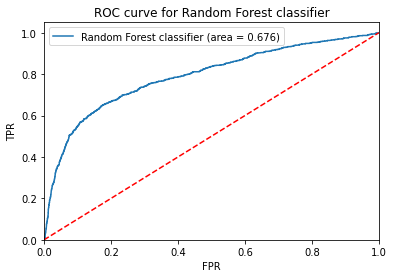

In [715]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
roc_auc = roc_auc_score(y_test, model1.predict(X_test_new))
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test_new)[:,1])
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest classifier')
plt.legend(loc="upper left")
plt.show()

In [716]:
feature_importance = model1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

30


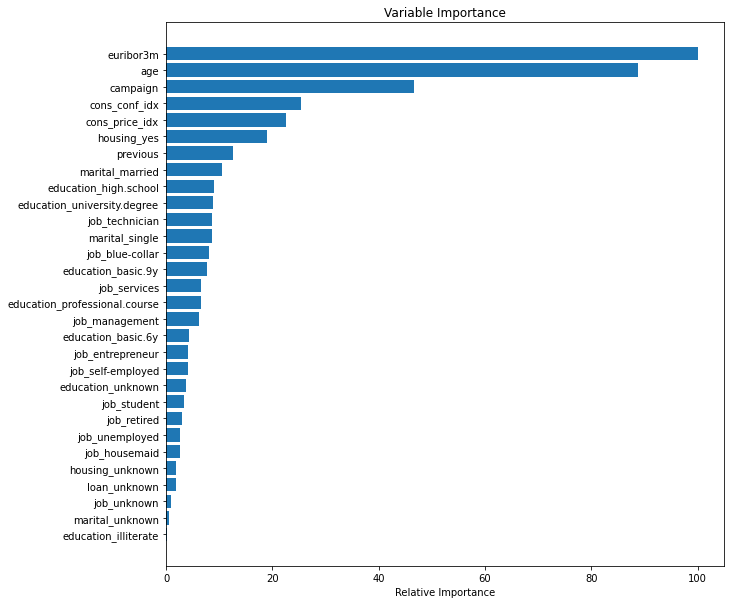

In [717]:
feature_importance = model1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_new.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
Feature importance shows cons_conf_idx, age as the important features.

### Deployment

In [718]:
#Dumping the model object
import pickle
pickle.dump(model, open('term_deposit_prediction.pkl','wb'))